# Análise da diferença salarial para trabalhadores de TI conforme a escolaridade de cada indivíduo.


Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres com funções trabalhistas de TI distribuídos em qualquer setor produtivo na cidade de Sorocaba, conforme a escolaridade de cada indivíduo em um recorte de 2012, 2013 e 2019.



## Etapas iniciais para realização das análises:


### Imports necessários para realização dos processamentos e análises:


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [9]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

# Faixas de idades: 18 - 24 # 25 - 30 # 31 - 40 # 41 - 50 # 51 - 90
replace_values_faixas = {(18, 19, 20, 21, 22, 23, 24): '18 - 24',
                  (25, 26, 27, 28, 29, 30): '25 - 30',
                  (31, 32, 33, 34, 35, 36, 37, 38, 39, 40): '31 - 40',
                  (41, 42, 43, 44, 45, 46, 47, 48, 49, 50): '41 - 50',
                  (51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
                   71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90): '51 - 90'}

### Etapa de leitura dos dados das tabelas em CSV para 2012, 2013 e 2014:


In [17]:
# Leitura da tabela de dados gerais para 2012:
RAIS_GERAL_2012 = pd.read_csv("../data/SP2012.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2012.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [19]:
# Leitura da tabela de dados gerais para 2013:
RAIS_GERAL_2013 = pd.read_csv("../data/SP2013.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2013.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [21]:
# Leitura da tabela de dados gerais para 2014:
RAIS_GERAL_2014 = pd.read_csv("../data/SP2014.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2014.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de escolaridade para utilização correta:


In [24]:
# Retirando dados referentes a indivíduos com menos de 18:
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012['Idade'] >= 18]
RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013['Idade'] >= 18]
RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014['Idade'] >= 18]

# Retirando dados referentes a indivíduos com mais de 90:
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012['Idade'] <= 90]
RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013['Idade'] <= 90]
RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014['Idade'] <= 90]

In [ ]:
# Substituição dos valores de cada idade pelas faixas definidas:

RAIS_GERAL_2012['Idade'].replace(replace_values_faixas, inplace = True)
RAIS_GERAL_2013['Idade'].replace(replace_values_faixas, inplace = True)
RAIS_GERAL_2014['Idade'].replace(replace_values_faixas, inplace = True)

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [30]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2012 (data dos dados para 2012) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2012 = 1.94801240

RAIS_GERAL_2012["Remuneração"] = RAIS_GERAL_2012["Remuneração"] * fator_correcao_inflacao_2012

# Índice de correção de inflação para o período de 12/2013 (data dos dados para 2013) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2013 = 1.84499480

RAIS_GERAL_2013["Remuneração"] = RAIS_GERAL_2013["Remuneração"] * fator_correcao_inflacao_2013

# Índice de correção de inflação para o período de 12/2014 (data dos dados para 2014) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2014 = 1.73509650

RAIS_GERAL_2014["Remuneração"] = RAIS_GERAL_2014["Remuneração"] * fator_correcao_inflacao_2014

### Exibição das tabelas gerais para cada ano:


In [34]:
# Exibindo os cinco primeiros dados da tabela de 2012:
RAIS_GERAL_2012.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,6,25 - 30,355220,2,"9,467.34",1
1,317110,62015,6,6,41 - 50,355220,2,"2,115.54",1
2,317115,62015,5,7,31 - 40,355220,9,"2,142.81",1
3,317110,62091,3,7,18 - 24,355220,2,"4,234.98",1
4,212420,63119,4,7,25 - 30,355220,9,"4,371.34",1


In [36]:
# Exibindo os cinco primeiros dados da tabela de 2013:
RAIS_GERAL_2013.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,142510,62015,4,5,25 - 30,355220,9,"7,542.34",1
1,317110,62015,3,7,18 - 24,355220,9,"2,770.55",1
2,212420,62040,6,7,41 - 50,355220,2,"3,160.29",1
3,212420,62040,6,7,41 - 50,355220,2,"16,904.32",1
4,212420,62040,5,7,25 - 30,355220,4,"2,844.28",1


In [38]:
# Exibindo os cinco primeiros dados da tabela de 2014:
RAIS_GERAL_2014.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62091,3,2,18 - 24,355220,2,"2,630.94",1
1,317105,62015,5,6,31 - 40,355220,9,"2,236.50",1
2,317105,62015,3,6,18 - 24,355220,9,"2,342.38",1
3,317110,62015,4,6,25 - 30,355220,9,"2,654.54",1
4,317110,62091,4,7,25 - 30,355220,2,"3,520.11",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:


### Criação das tabelas para relatório e tabela para formação do gráfico:


In [44]:
# Tabela principal para quantidade em 2012:
RAIS_GERAL_2012_QNT = pd.crosstab(RAIS_GERAL_2012["Idade"], RAIS_GERAL_2012["Sexo"].replace(sexo))
RAIS_GERAL_2012_QNT.insert(1, "% Fem.", RAIS_GERAL_2012_QNT["Fem."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)
RAIS_GERAL_2012_QNT.insert(3, "% Masc.", RAIS_GERAL_2012_QNT["Masc."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)

In [50]:
RAIS_GERAL_2012_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Idade,,,,
18 - 24,25,26.04,71,73.96
25 - 30,26,18.57,114,81.43
31 - 40,15,18.07,68,81.93
41 - 50,4,26.67,11,73.33
51 - 90,0,0.00,2,100.00


In [48]:
# Tabela principal para quantidade em 2013:
RAIS_GERAL_2013_QNT = pd.crosstab(RAIS_GERAL_2013["Idade"], RAIS_GERAL_2013["Sexo"].replace(sexo))
RAIS_GERAL_2013_QNT.insert(1, "% Fem.", RAIS_GERAL_2013_QNT["Fem."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)
RAIS_GERAL_2013_QNT.insert(3, "% Masc.", RAIS_GERAL_2013_QNT["Masc."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)

In [52]:
RAIS_GERAL_2013_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Idade,,,,
18 - 24,31,20.39,121,79.61
25 - 30,22,14.47,130,85.53
31 - 40,25,21.74,90,78.26
41 - 50,5,21.74,18,78.26
51 - 90,0,0.00,4,100.00


In [54]:
# Tabela principal para quantidade em 2014:
RAIS_GERAL_2014_QNT = pd.crosstab(RAIS_GERAL_2014["Idade"], RAIS_GERAL_2014["Sexo"].replace(sexo))
RAIS_GERAL_2014_QNT.insert(1, "% Fem.", RAIS_GERAL_2014_QNT["Fem."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)
RAIS_GERAL_2014_QNT.insert(3, "% Masc.", RAIS_GERAL_2014_QNT["Masc."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)

In [56]:
RAIS_GERAL_2014_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Idade,,,,
18 - 24,29,17.79,134,82.21
25 - 30,32,16.08,167,83.92
31 - 40,25,18.12,113,81.88
41 - 50,6,19.35,25,80.65
51 - 90,0,0.00,4,100.00


In [58]:
# Tabela para gráfico da quantidade em 2012:
RAIS_GERAL_2012_QNT.insert(4, "Total", RAIS_GERAL_2012_QNT["% Masc."] + RAIS_GERAL_2012_QNT["% Fem."])
RAIS_GERAL_2012_QNT.insert(5, "Ano", "2012")

# Tabela para gráfico da quantidade em 2013:
RAIS_GERAL_2013_QNT.insert(4, "Total", RAIS_GERAL_2013_QNT["% Masc."] + RAIS_GERAL_2013_QNT["% Fem."])
RAIS_GERAL_2013_QNT.insert(5, "Ano", "2013")

# Tabela para gráfico da quantidade em 2014:
RAIS_GERAL_2014_QNT.insert(4, "Total", RAIS_GERAL_2014_QNT["% Masc."] + RAIS_GERAL_2014_QNT["% Fem."])
RAIS_GERAL_2014_QNT.insert(5, "Ano", "2014")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2012_QNT, RAIS_GERAL_2013_QNT, RAIS_GERAL_2014_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:


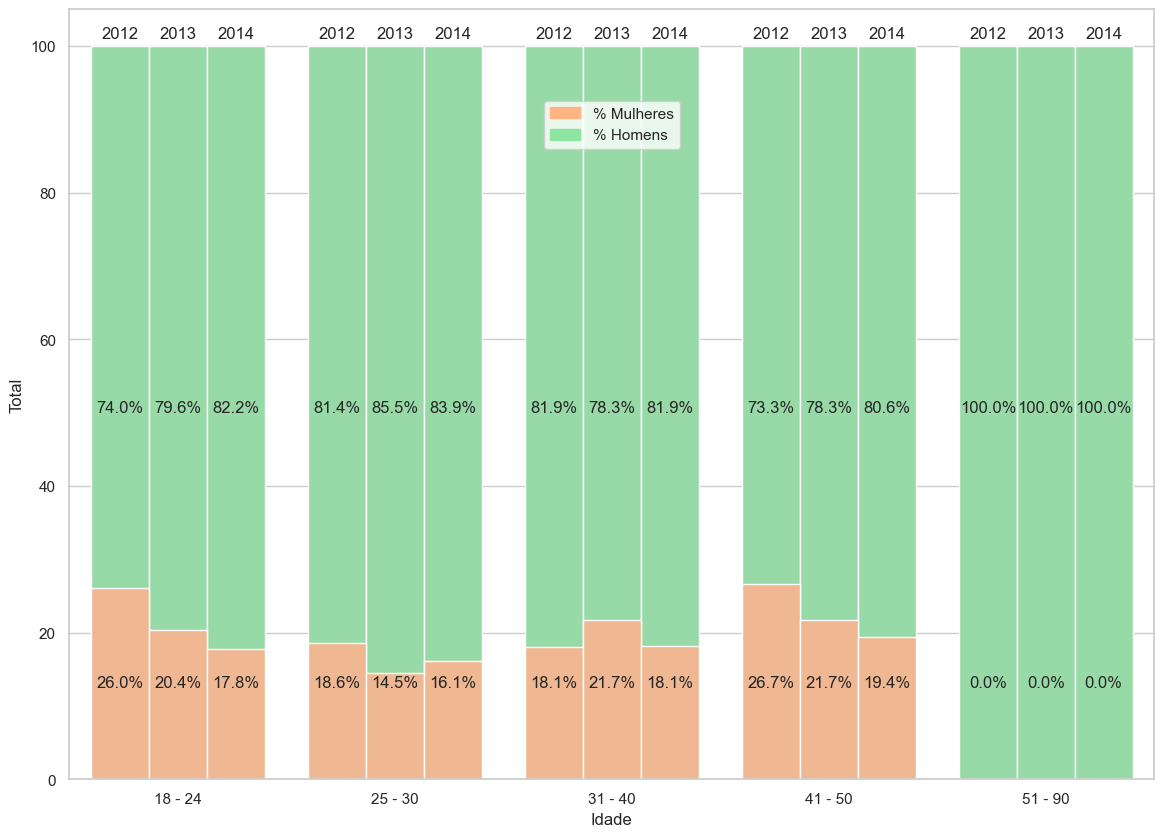

In [75]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(14,10))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Idade", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2012": color_masc, "2013": color_masc, "2014": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i, patch in enumerate(patches):
    if i < len(RAIS_GERAL_QNT_GRAF):  # Verifique se o índice está dentro do limite
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() / 2
        bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."].iloc[i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i, patch in enumerate(patches):
    if i < len(RAIS_GERAL_QNT_GRAF):  # Verifique se o índice está dentro do limite
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() + 1
        bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"].iloc[i]), (x, y), ha='center')

# Criação da segunda barra, referente à porcentagem das mulheres:
bar2 = sns.barplot(x="Idade", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2012": color_fem, "2013": color_fem, "2014": color_fem})

# Captura das barras recém criadas:
patches = bar2.patches

# Escrita da porcentagem para cada barra capturada das mulheres:
for i, patch in enumerate(patches):
    if i < len(RAIS_GERAL_QNT_GRAF):  # Verifique se o índice está dentro do limite
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() / 8
        bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."].iloc[i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

plt.savefig("./figures/svg/qnt_sexo_idade.svg")

## Análise das médias salariais e diferenças:


### Distribuição da remuneração para cada sexo cruzado pela escolaridade:


In [ ]:
RAIS_GERAL_2012_BOX = RAIS_GERAL_2012.copy()
RAIS_GERAL_2012_BOX["Sexo"].replace(sexo, inplace = True)

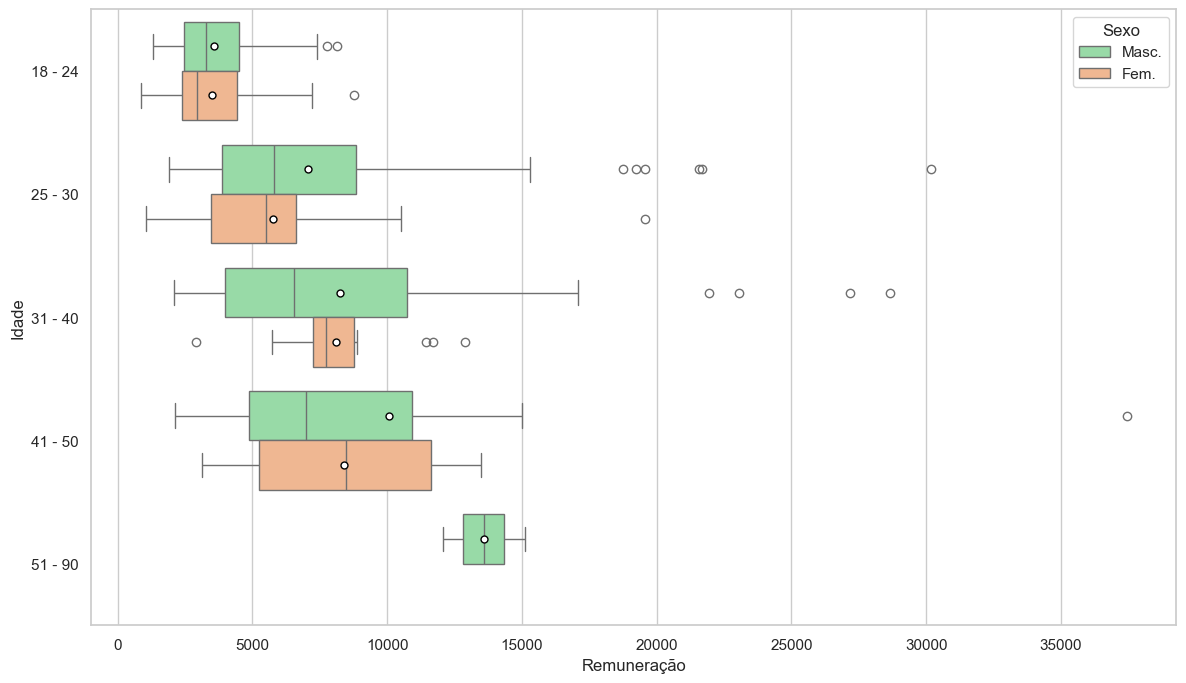

In [84]:
box = sns.boxplot(x = 'Remuneração', y = 'Idade', hue = 'Sexo', data = RAIS_GERAL_2012_BOX, orient = 'h', showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = replace_values_faixas.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_idade_2012.png", dpi = 300)

In [ ]:
RAIS_GERAL_2013_BOX = RAIS_GERAL_2013.copy()
RAIS_GERAL_2013_BOX["Sexo"].replace(sexo, inplace = True)

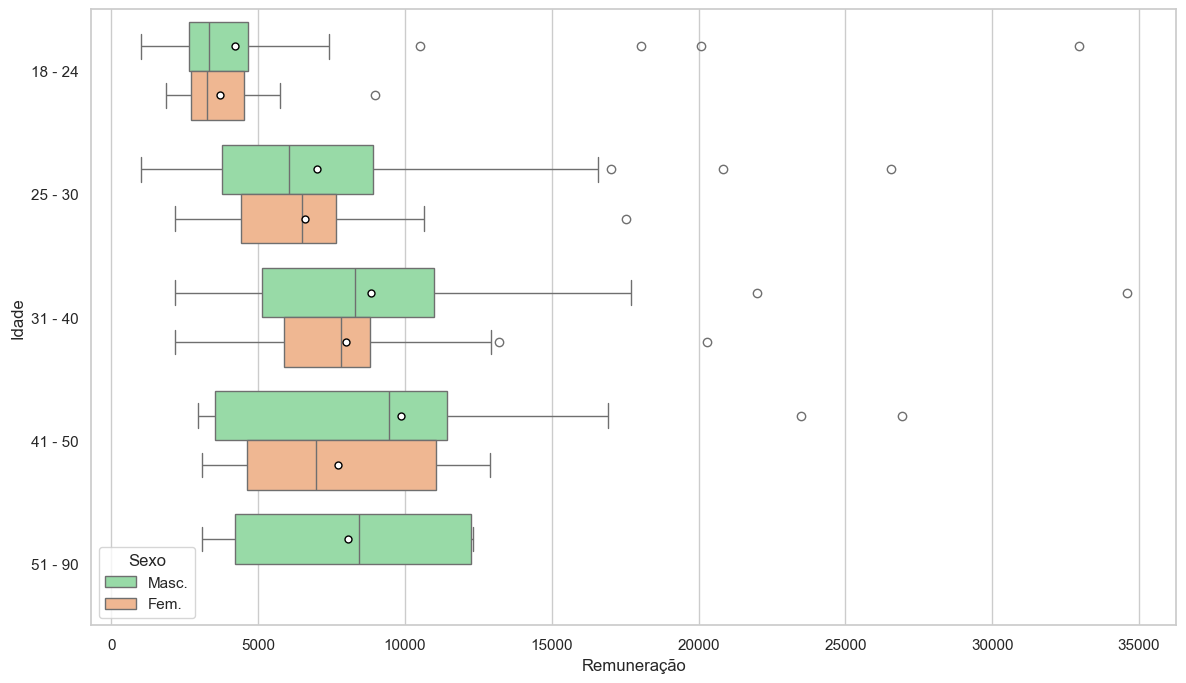

In [88]:
box = sns.boxplot(x = 'Remuneração', y = 'Idade', hue = 'Sexo', data = RAIS_GERAL_2013_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = replace_values_faixas.values(),
                        palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_idade_2013.png", dpi = 300)

In [ ]:
RAIS_GERAL_2014_BOX = RAIS_GERAL_2014.copy()
RAIS_GERAL_2014_BOX["Sexo"].replace(sexo, inplace = True)

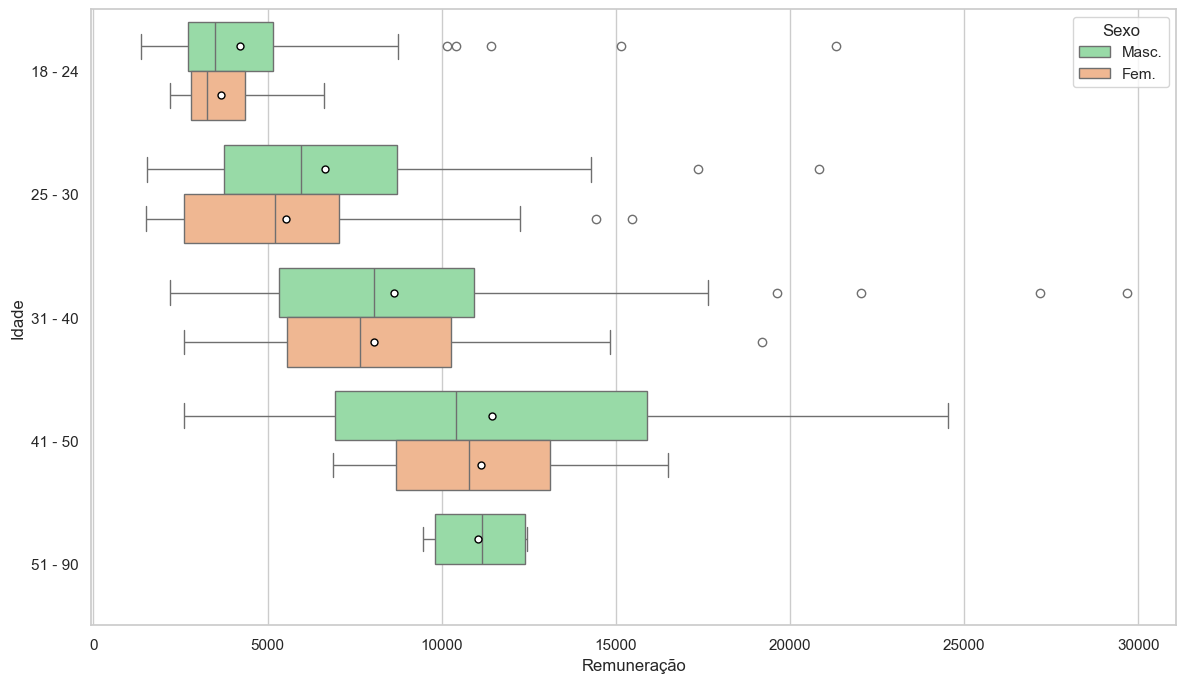

In [92]:
box = sns.boxplot(x = 'Remuneração', y = 'Idade', hue = 'Sexo', data = RAIS_GERAL_2014_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = replace_values_faixas.values(),
                        palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_idade_2014.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:


In [97]:
# Tabela principal para média e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIA = pd.crosstab(RAIS_GERAL_2012["Idade"], RAIS_GERAL_2012["Sexo"].replace(sexo), values = RAIS_GERAL_2012.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2012_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIA["Fem."] - RAIS_GERAL_2012_MEDIA["Masc."]) / RAIS_GERAL_2012_MEDIA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,510.71","3,568.92",-1.63
25 - 30,"5,752.62","7,057.07",-18.48
31 - 40,"8,114.62","8,243.89",-1.57
41 - 50,"8,395.21","10,058.23",-16.53
51 - 90,NaN,"13,590.76",NaN


In [99]:
# Tabela principal para média e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIA = pd.crosstab(RAIS_GERAL_2013["Idade"], RAIS_GERAL_2013["Sexo"].replace(sexo), values = RAIS_GERAL_2013.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2013_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIA["Fem."] - RAIS_GERAL_2013_MEDIA["Masc."]) / RAIS_GERAL_2013_MEDIA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,692.13","4,200.76",-12.11
25 - 30,"6,588.07","6,989.16",-5.74
31 - 40,"8,005.37","8,834.73",-9.39
41 - 50,"7,723.42","9,881.22",-21.84
51 - 90,NaN,"8,055.71",NaN


In [101]:
# Tabela principal para média e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIA = pd.crosstab(RAIS_GERAL_2014["Idade"], RAIS_GERAL_2014["Sexo"].replace(sexo), values = RAIS_GERAL_2014.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2014_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIA["Fem."] - RAIS_GERAL_2014_MEDIA["Masc."]) / RAIS_GERAL_2014_MEDIA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,652.23","4,203.53",-13.12
25 - 30,"5,539.13","6,652.94",-16.74
31 - 40,"8,052.97","8,633.97",-6.73
41 - 50,"11,130.40","11,430.37",-2.62
51 - 90,NaN,"11,053.68",NaN


In [103]:
RAIS_GERAL_2012_MEDIA.insert(3, "Ano", "2012")
RAIS_GERAL_2013_MEDIA.insert(3, "Ano", "2013")
RAIS_GERAL_2014_MEDIA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIA, RAIS_GERAL_2013_MEDIA, RAIS_GERAL_2014_MEDIA]).reset_index()

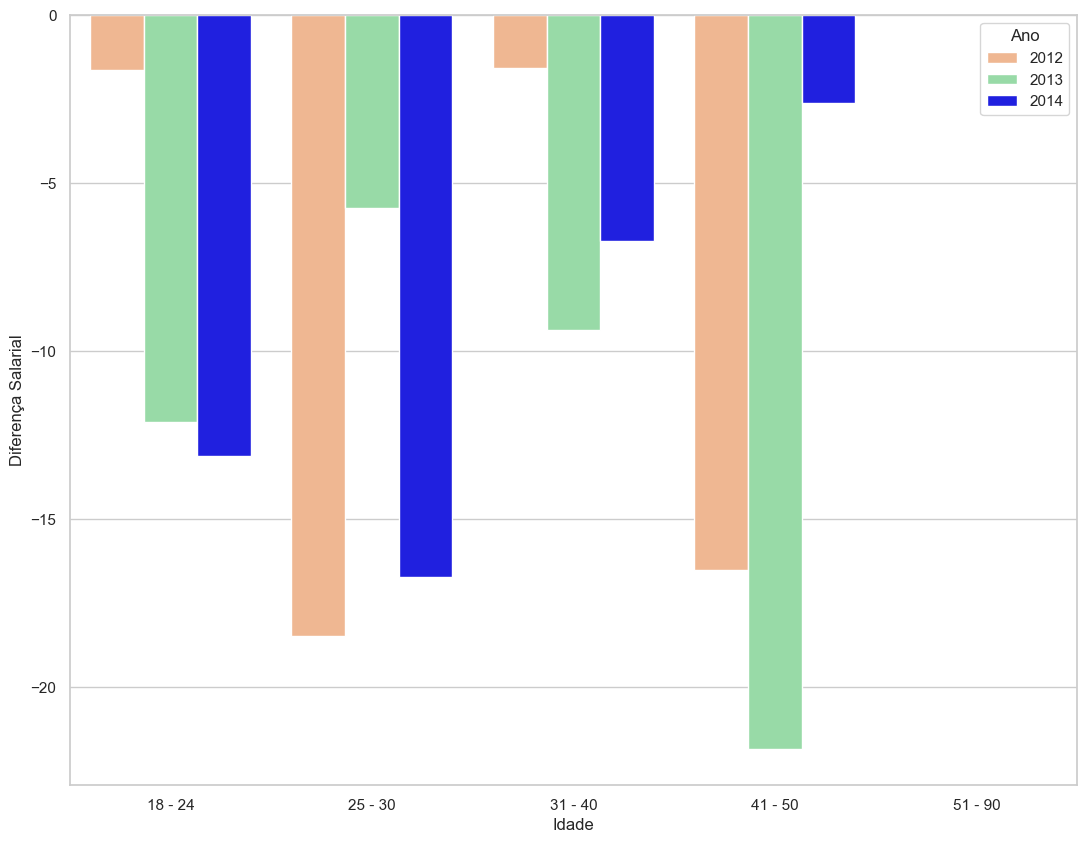

In [107]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2012": color_fem,"2013": color_masc,"2014": "blue"})

# Captura da quantidade de barras existentes:
patches = bar.patches

plt.savefig("./figures/png/dif_salarial_sexo_idade_media.png", dpi = 300)

In [109]:
# Tabela principal para mediana e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIANA = pd.crosstab(RAIS_GERAL_2012["Idade"], RAIS_GERAL_2012["Sexo"].replace(sexo), values = RAIS_GERAL_2012.Remuneração, aggfunc = 'median')
RAIS_GERAL_2012_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIANA["Fem."] - RAIS_GERAL_2012_MEDIANA["Masc."]) / RAIS_GERAL_2012_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"2,948.61","3,292.88",-10.46
25 - 30,"5,490.75","5,810.71",-5.51
31 - 40,"7,724.30","6,548.10",17.96
41 - 50,"8,486.25","6,995.31",21.31
51 - 90,NaN,"13,590.76",NaN


In [111]:
# Tabela principal para mediana e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIANA = pd.crosstab(RAIS_GERAL_2013["Idade"], RAIS_GERAL_2013["Sexo"].replace(sexo), values = RAIS_GERAL_2013.Remuneração, aggfunc = 'median')
RAIS_GERAL_2013_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIANA["Fem."] - RAIS_GERAL_2013_MEDIANA["Masc."]) / RAIS_GERAL_2013_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,271.62","3,320.99",-1.49
25 - 30,"6,480.25","6,060.81",6.92
31 - 40,"7,827.93","8,302.48",-5.72
41 - 50,"6,953.99","9,467.50",-26.55
51 - 90,NaN,"8,423.74",NaN


In [113]:
# Tabela principal para mediana e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIANA = pd.crosstab(RAIS_GERAL_2014["Idade"], RAIS_GERAL_2014["Sexo"].replace(sexo), values = RAIS_GERAL_2014.Remuneração, aggfunc = 'median')
RAIS_GERAL_2014_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIANA["Fem."] - RAIS_GERAL_2014_MEDIANA["Masc."]) / RAIS_GERAL_2014_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,264.15","3,487.21",-6.40
25 - 30,"5,205.29","5,956.40",-12.61
31 - 40,"7,655.23","8,067.92",-5.12
41 - 50,"10,784.97","10,410.58",3.60
51 - 90,NaN,"11,150.86",NaN


In [115]:
RAIS_GERAL_2012_MEDIANA.insert(3, "Ano", "2012")

RAIS_GERAL_2013_MEDIANA.insert(3, "Ano", "2013")

RAIS_GERAL_2014_MEDIANA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIANA, RAIS_GERAL_2013_MEDIANA, RAIS_GERAL_2014_MEDIANA]).reset_index()

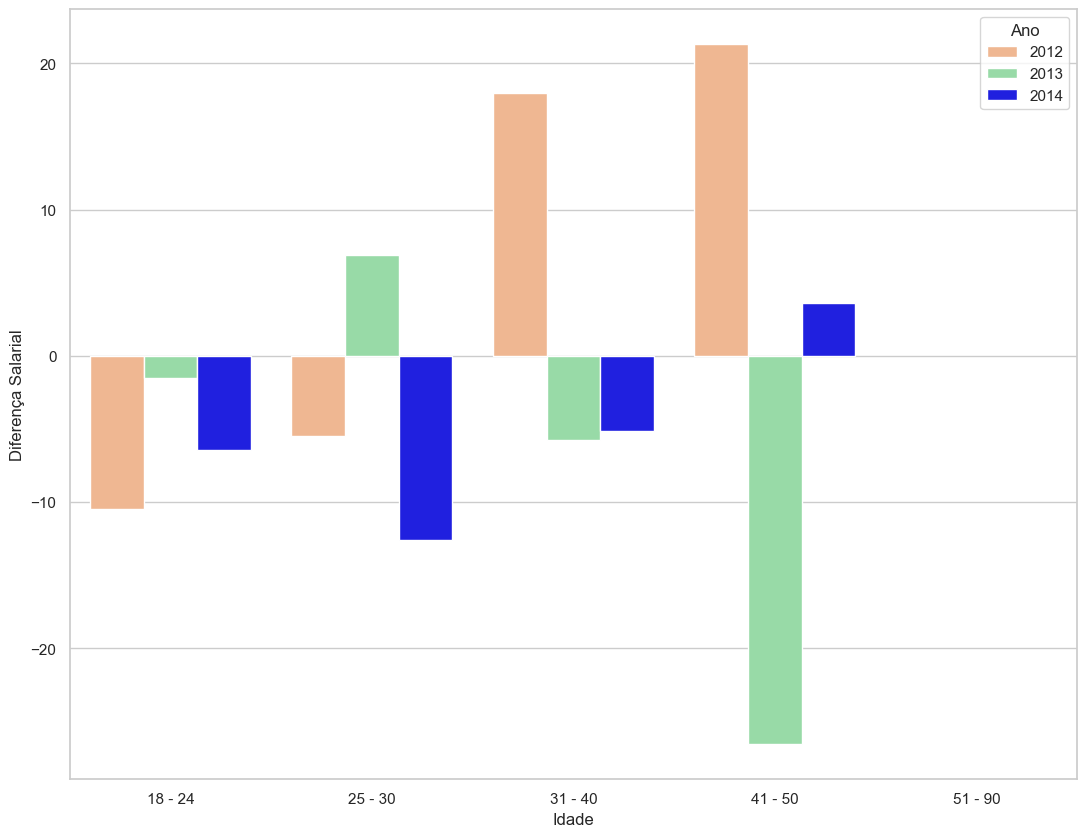

In [117]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2012": color_fem,"2013": color_masc,"2014": "blue"})

# Captura da quantidade de barras existentes:
patches = bar.patches

plt.savefig("./figures/png/dif_salarial_sexo_idade_mediana.png", dpi = 300)

### Teste de hipótese para cada grupo de médias por CBOs:


In [120]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [122]:
RAIS_GERAL_2012.query("Sexo == 1")

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,6,25 - 30,355220,2,"9,467.34",1
1,317110,62015,6,6,41 - 50,355220,2,"2,115.54",1
2,317115,62015,5,7,31 - 40,355220,9,"2,142.81",1
3,317110,62091,3,7,18 - 24,355220,2,"4,234.98",1
4,212420,63119,4,7,25 - 30,355220,9,"4,371.34",1
...,...,...,...,...,...,...,...,...,...
261,212405,62040,4,9,25 - 30,355220,2,"8,460.70",1
262,212405,62040,4,9,25 - 30,355220,2,"8,412.90",1
263,212405,62040,3,9,18 - 24,355220,9,"4,587.30",1
264,317110,62031,4,9,25 - 30,355220,2,"2,107.75",1


In [126]:
TESTE_HIP_2012 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for idade in replace_values_faixas:
    df1 = RAIS_GERAL_2012.query("Sexo == 1").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    df2 = RAIS_GERAL_2012.query("Sexo == 2").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração

    # Verificação se df1 e df2 não estão vazios
    if df1.empty or df2.empty:
        TESTE_HIP_2012.loc[replace_values_faixas[idade]] = [None, None, 'Uma das amostras está vazia']
        continue

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2012.loc[replace_values_faixas[idade]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2012_HIP = pd.merge(RAIS_GERAL_2012_MEDIANA, TESTE_HIP_2012, left_index=True, right_index=True)
RAIS_GERAL_2012_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2012_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2012_HIP.head()


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Idade,,,,,
18 - 24,"2,948.61","3,292.88",830.0,0.01 > 0.31707...,Medianas estatisticamente iguais
25 - 30,"5,490.75","5,810.71",1265.0,0.01 > 0.12299...,Medianas estatisticamente iguais
31 - 40,"7,724.30","6,548.10",426.5,0.01 > 0.16298...,Medianas estatisticamente iguais
41 - 50,"8,486.25","6,995.31",20.5,0.01 > 0.44802...,Medianas estatisticamente iguais
51 - 90,NaN,"13,590.76",None,None,Uma das amostras está vazia


In [128]:
TESTE_HIP_2013 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for idade in replace_values_faixas:
    df1 = RAIS_GERAL_2013.query("Sexo == 1").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    df2 = RAIS_GERAL_2013.query("Sexo == 2").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração

    # Verificação se df1 e df2 não estão vazios
    if df1.empty or df2.empty:
        TESTE_HIP_2013.loc[replace_values_faixas[idade]] = [None, None, 'Uma das amostras está vazia']
        continue

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2013.loc[replace_values_faixas[idade]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2013_HIP = pd.merge(RAIS_GERAL_2013_MEDIANA, TESTE_HIP_2013, left_index=True, right_index=True)
RAIS_GERAL_2013_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2013_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2013_HIP.head()


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Idade,,,,,
18 - 24,"3,271.62","3,320.99",1817.5,0.01 > 0.39628...,Medianas estatisticamente iguais
25 - 30,"6,480.25","6,060.81",1452.5,0.01 > 0.54794...,Medianas estatisticamente iguais
31 - 40,"7,827.93","8,302.48",1014.0,0.01 > 0.22684...,Medianas estatisticamente iguais
41 - 50,"6,953.99","9,467.50",43.0,0.01 > 0.45546...,Medianas estatisticamente iguais
51 - 90,NaN,"8,423.74",None,None,Uma das amostras está vazia


In [130]:
TESTE_HIP_2014 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for idade in replace_values_faixas:
    df1 = RAIS_GERAL_2014.query("Sexo == 1").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    df2 = RAIS_GERAL_2014.query("Sexo == 2").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração

    # Verificação se df1 e df2 não estão vazios
    if df1.empty or df2.empty:
        TESTE_HIP_2014.loc[replace_values_faixas[idade]] = [None, None, 'Uma das amostras está vazia']
        continue

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2014.loc[replace_values_faixas[idade]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2014_HIP = pd.merge(RAIS_GERAL_2014_MEDIANA, TESTE_HIP_2014, left_index=True, right_index=True)
RAIS_GERAL_2014_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2014_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2014_HIP.head()


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Idade,,,,,
18 - 24,"3,264.15","3,487.21",1806.5,0.01 > 0.27752...,Medianas estatisticamente iguais
25 - 30,"5,205.29","5,956.40",2068.5,0.01 > 0.02166...,Medianas estatisticamente iguais
31 - 40,"7,655.23","8,067.92",1331.5,0.01 > 0.32815...,Medianas estatisticamente iguais
41 - 50,"10,784.97","10,410.58",73.0,0.01 > 0.47089...,Medianas estatisticamente iguais
51 - 90,NaN,"11,150.86",None,None,Uma das amostras está vazia
